# <h2><b> Đồ án thực hành </b></h2>
<h1 style='color:red;text-align:center;font-size:35px'><b>Chủ đề: Dự đoán giá rượu vang</b></h1>

# <h3>Các thành viên trong nhóm</h3>
<li> Phan Xuân Hoài - 20120481 </li>
<li> Lê Kinh Luân - 1612355 </li>
<li> Nguyễn Minh Nghĩa - 20120534</li>
<li> Phạm Quốc Hưng - 19120522</li>

# <h1 style='color:blue;text-align:center;font-size:30px'><b>Phần I - C.Đặt các câu hỏi có ý nghĩa cần trả lời</b></h1>

## Import những thư viện cần thiết

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_theme()

# YOUR CODE HERE (OPTION)
# Nếu cần các thư viện khác thì bạn có thể import ở đây
import os
import re
import statistics
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

In [ ]:
import sys
sys.executable

In [ ]:
cd champagne/champagne

### Đọc file 'champagnes_info_cleaned.csv' vào dataframe df

In [4]:
df = pd.read_csv('./dataset/champagne_info_cleaned.csv', index_col = 0)
df.head(20)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,VNPV-3958,Rượu Champagne Bottega Stardust Prosecco,3563000.0,Ý,11.0,750.0,Glera,vàng rơm nhạt,Rượu Champagne,Bottega,Veneto
1,VNPV-9463,Rượu Champagne Carbon F1,8517000.0,Pháp,12.0,750.0,"Chardonnay,Pinot meunier,Pinot Noir",trắng,Rượu Champagne,Delamotte,Champagne
2,VNPV1-1823,Rượu Champagne Charles Mignon Premium Reserve,1641000.0,Pháp,13.5,750.0,"Chardonnay,Pinot meunier,Pinot Noir",vàng,Rượu Champagne,Charles Mignon,Champagne
3,VNPV-836,Rượu Champagne De Castellane Brut,753000.0,Pháp,11.0,375.0,Chardonnay,xanh nhạt,Rượu Champagne,De Castellane,Champagne
4,VNPV-4233,Rượu Champagne Delamotte Blanc De Blancs,3810000.0,Pháp,12.5,750.0,Chardonnay,trắng trong,Rượu Champagne,Delamotte,Champagne
5,VNPV-1956,Rượu Champagne Delamotte Brut,1761000.0,Pháp,12.0,750.0,Chardonnay,vàng,Rượu Champagne,Delamotte,Champagne
6,VNPV-3667,Rượu Champagne Delamotte Rose,2956000.0,Pháp,12.0,750.0,"Chardonnay,Pinot Noir,Pinot Meunier",hồng,Rượu Champagne,Delamotte,Champagne
7,VNPV-1976,Rượu Champagne Duval Leroy Thierry Drapeau,1779000.0,Pháp,12.5,750.0,Chardonnay,vàng,Rượu Champagne,Champagne Duval Leroy,Champagne
8,VNTK3-480,Rượu Champagne JP Chenet Brut Blanc,480000.0,Pháp,13.0,750.0,Chardonnay,đỏ đậm,Rượu Vang Nổ,JP Chenet,Pays d’Oc
9,VNBMF-744,Rượu Champagne JP Chenet Divine Chardonnay,750000.0,Pháp,12.5,750.0,Chardonnay,vàng rơm,Rượu Vang Nổ,JP Chenet,Pays d’Oc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 0 to 3933
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ma_sp          3934 non-null   object 
 1   Ten_sp         3934 non-null   object 
 2   Gia            3934 non-null   float64
 3   Xuat_xu        3934 non-null   object 
 4   Nong_do        3934 non-null   float64
 5   Dung_tich      3934 non-null   float64
 6   Giong_nho      3934 non-null   object 
 7   Mau_sac        3934 non-null   object 
 8   Loai_ruou      3934 non-null   object 
 9   Thuong_hieu    3934 non-null   object 
 10  Vung_lam_vang  3934 non-null   object 
dtypes: float64(3), object(8)
memory usage: 368.8+ KB


## <h2 style='color:#8edc55'>Câu 1. Giữa màu sắc, thương hiệu có mối tương quan như thế nào đối với giá rượu?  </h2>

**Lợi ích khi trả lời được câu hỏi:** 
+ Với người mua, họ có thể tham khảo để xác định được giá của một chai rượu vang họ muốn mua có đang là hợp lý, tránh bị lừa.
+ Với người bán, họ có thể tham khảo để đưa ra một mức giá bán hợp lý cho sản phẩm

**Nguồn cảm hứng của câu hỏi:** tự nghĩ

---

### <h3 style='color:#4cc3f1'> 1.1 Mối tương quan giữa thương hiệu đối với giá rượu  </h3>

<h3 style='color:#c177e4'> Bước 1: Lấy ra một số thương hiệu để đánh giá </h3>

* Từ bảng `cat_col_info_df` ta thấy có đến 1620 thương hiệu trong khi dữ liệu chỉ có 5598 dòng. Vì vậy sẽ có nhiều thương hiệu xuất hiện tương đối ít. Ta cần chọn ra các thương hiệu có số lần xuất hiện tương đối cao để có thể đánh giá sự phụ thuộc giữa thương hiệu và giá rượu vang 

In [6]:
# Tính số lần xuất hiện của mỗi thương hiệu
count_appear = df['Thuong_hieu'].value_counts()
count_appear

Borie Manoux            246
Louis Jadot             122
Concha Y Toro            84
Vignobles JeanJean       75
Trivento                 58
                       ... 
Domaine La Bastide        1
Domaine Labruyere         1
Domaine Le Colombier      1
Domaine Les Poete         1
Ventiterre                1
Name: Thuong_hieu, Length: 1243, dtype: int64

In [7]:
#Lấy ra các thương hiệu xuất hiện từ 25 lần
brand_top = count_appear.index[count_appear >= 25]
brand_top

Index(['Borie Manoux', 'Louis Jadot', 'Concha Y Toro', 'Vignobles JeanJean',
       'Trivento', 'Montgras', 'Tinazzi', 'Paul Jaboulet Aine', 'Santa Rita',
       '7Colores', 'Ampelidae'],
      dtype='object')

<h3 style='color:#c177e4'> Bước 2: Tạo dataframe chỉ gồm các thương hiệu đã chọn</h3>

In [8]:
lis_brand_top = brand_top.values.tolist()
mask = df['Thuong_hieu'].isin(lis_brand_top)
brand_vs_price = df.loc[mask,['Thuong_hieu', 'Gia']]

<h3 style='color:#c177e4'> Bước 3: Trực quan </h3>

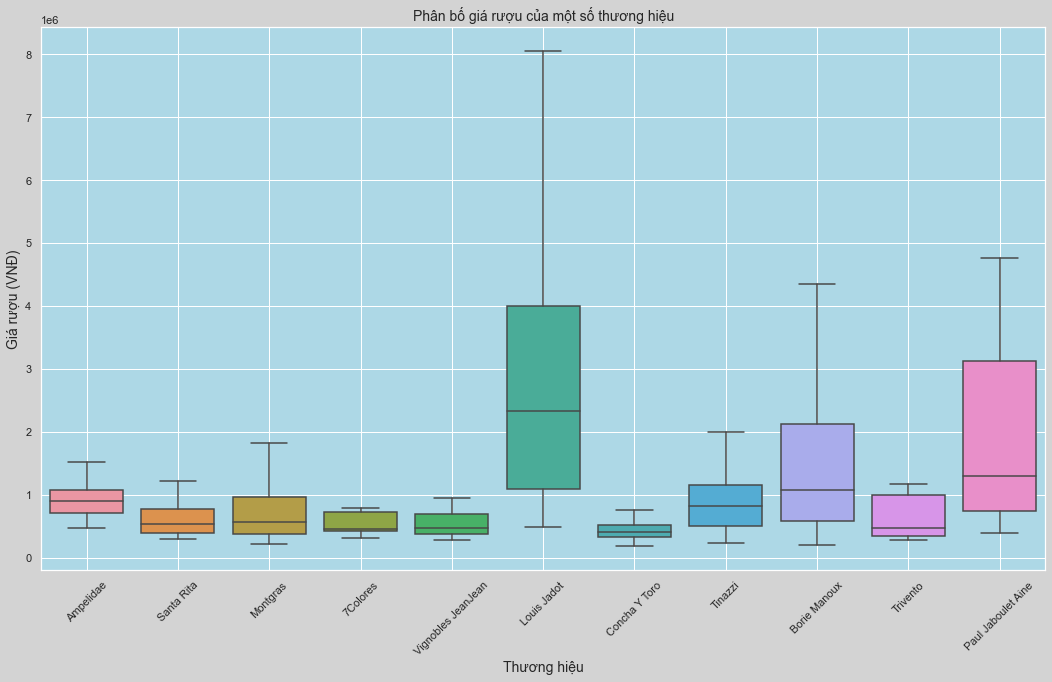

In [9]:
plt.figure(figsize=(18,10))
sns.boxplot(data=brand_vs_price, y='Gia', x = 'Thuong_hieu',showfliers=False)
plt.xticks(rotation=45)
plt.title('Phân bố giá rượu của một số thương hiệu', fontsize=14)
plt.xlabel('Thương hiệu', fontsize=14)
plt.ylabel('Giá rượu (VNĐ)', fontsize=14)
plt.grid(True)
plt.show()

<h3 style='color:#c177e4'> Bước 4: Đánh giá </h3>

🤔🤔🤔 Từ biểu đồ trên ta thấy:
* Hầu hết các thương hiệu được chọn có giá các sản phẩm phân bố nằm chủ yếu trong khoảng từ 200.000 VNĐ đến 1.000.000 VNĐ. Trong đó các thương hiệu `7Colores`, `Vignobles JeanJean` ,`Convha Y Toro` nằm hoàn toàn trong khoảng trên.
* Các thương hiệu `Ampelidae`,`Montgras`, `Tinazzi`, có khoảng từ 25% đến 30% sản phẩm có giá cao hơn các sản phẩm còn lại  thuộc cùng thương hiêu và nằm trong khoảng giá  1.000.000 - 2.000.000 VNĐ.
* Thương hiệu `Borie Manoux` và `Paul Jaboulet Aine` có trên 50% các sản phẩm có giá từ 1.000.000 - 4.800.000 VNĐ.
* Thương hiệu `Louis Jadot` là thương hiệu có nhiều sản phẩm có giá cao và vượt trội so với các thương hiệu khác khi giá cao nhất có thể lên đến khoảng 8.000.000 VNĐ

### <h3 style='color:#4cc3f1'> 1.2 Mối tương quan giữa màu sắc đối với giá rượu  </h3>

<h3 style='color:#c177e4'> Bước 1: Chọn những màu sắc xuất hiện nhiều </h3>

* Tương tự với thương hiệu ta sẽ chọn ra những màu sắc nổi bật hơn 

In [10]:
# Tính số lần xuất hiện của mỗi màu sắc
color_series = df['Mau_sac'].value_counts()
color_series

đỏ ruby                       1490
vàng rơm                       588
đỏ                             388
đỏ đậm                         317
vàng nhạt                      215
                              ... 
vàng rơm xanh                    1
đỏ ruby ngọc bích                1
vàng trắng có ánh bạc sáng       1
trắng ánh xanh                   1
đỏ đậm tối                       1
Name: Mau_sac, Length: 238, dtype: int64

In [11]:
# Chọn những màu sắc xuất hiện trên 25 lần
color_top = color_series.index[color_series >= 25]
color_top

Index(['đỏ ruby', 'vàng rơm', 'đỏ', 'đỏ đậm', 'vàng nhạt', 'đỏ ruby đậm',
       'vàng', 'vàng chanh', 'trắng', 'hồng nhạt'],
      dtype='object')

* Ta thấy có hai lần ` vàng nhạt ` xuất hiện hai lần. Ta sẽ chuyển chúng cho về giống nhau trong `df` và giữ lại 1 trong `color_top`.

In [12]:
mask = df['Mau_sac'] == 'vàng nhạt'
df.loc[mask, 'Mau_sac'] = 'vàng nhạt'
# Xóa bớt 1 vàng nhạt
color_top = color_top[color_top != 'vàng nhạt']

<h3 style='color:#c177e4'> Bước 2: Tạo dataframe chỉ gồm những màu sắc đã chọn </h3>

In [13]:
lis_color_top = color_top.values.tolist()
mask = df['Mau_sac'].isin(lis_color_top)
color_vs_price = df.loc[mask,['Mau_sac', 'Gia']]

<h3 style='color:#c177e4'> Bước 3: Trực quan </h3>

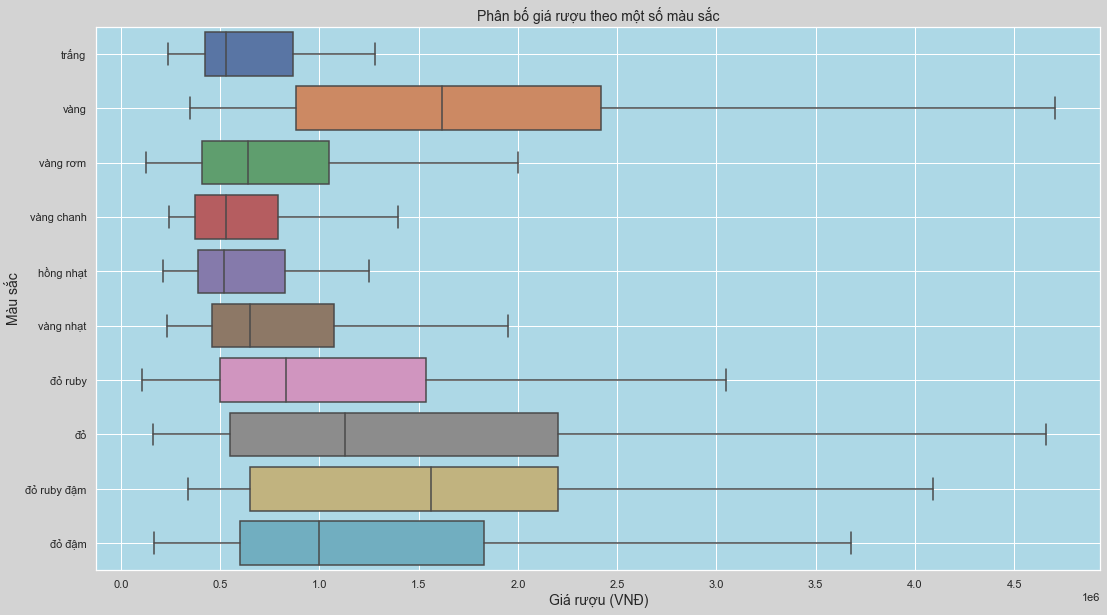

In [14]:
plt.figure(figsize=(18,10))
sns.boxplot(data=color_vs_price, y='Mau_sac', x = 'Gia',showfliers=False)
# plt.xticks(rotation=45)
plt.title('Phân bố giá rượu theo một số màu sắc', fontsize=14)
plt.xlabel('Giá rượu (VNĐ)', fontsize=14)
plt.ylabel('Màu sắc', fontsize=14)
plt.xticks(np.arange(0, 5000000, 500000))
plt.grid(True)
plt.show()

<h3 style='color:#c177e4'> Bước 4: Đánh giá </h3>

🤔🤔🤔 Từ biểu đồ trên ta thấy:
* Các màu rượu như ` trắng `, ` vàng chanh`, ` hồng nhạt ` có trên 80% các sản phẩm có giá từ 200.000 - 1.000.000 VNĐ.
* Các màu rượu  `vàng nhạt`, ` vàng rơm `, `đỏ ruby` có từ 55% đến 70% các sản phẩm có giá từ 200.000 - 1.000.000 VNĐ. Các sản phẩm còn lại thuộc những màu sắc này phân bố trải dài đến khoảng 2.000.000 VNĐ. Riêng với màu `đỏ ruby` giá cao nhất có thể lên đến 3.000.000 VNĐ
* Màu rượu ` vàng ` có nhiều sản phẩm có giá từ 2.000.000 VNĐ trở lên nhất so với các màu khác. Tiếp đó là các màu ` đỏ `, `đỏ ruby đậm `, `đỏ đậm ` là vượt trội hơn so với các màu còn lại . Trong đó màu ` vàng ` màu có sản phẩm có giá cao nhất tiếp đến là `đỏ`, `đỏ ruby đậm `, `đỏ đậm `.

---

## Câu hỏi 2: Ứng với mỗi mức nồng độ, đâu là những thương hiệu có giá thành thấp nhất ?

**Lợi ích khi trả lời được câu hỏi:** Khách hàng thì có nhiều đối tượng với nhu cầu mỗi người mỗi khác nhau, có người tửu lượng mạnh thì thích các loại rượu có nồng độ cao, có người thì thích những loại có nồng độ yếu hơn. Mục tiêu ở đây là giúp người mua có thể biết được các thương hiệu có giá thành ổn nhất đối với từng mức nồng độ, từ đó đưa ra các lựa chọn phù hợp với túi tiền của mình.

---

### Các bước thực hiện

Chỉ lấy ra các cột cần thiết

In [15]:
filter_df = df.loc[:,['Ma_sp','Ten_sp','Nong_do','Thuong_hieu','Gia']]
filter_df.head(5)

,Ma_sp,Ten_sp,Nong_do,Thuong_hieu,Gia
0,VNPV-3958,Rượu Champagne Bottega Stardust Prosecco,11.0,Bottega,3563000.0
1,VNPV-9463,Rượu Champagne Carbon F1,12.0,Delamotte,8517000.0
2,VNPV1-1823,Rượu Champagne Charles Mignon Premium Reserve,13.5,Charles Mignon,1641000.0
3,VNPV-836,Rượu Champagne De Castellane Brut,11.0,De Castellane,753000.0
4,VNPV-4233,Rượu Champagne Delamotte Blanc De Blancs,12.5,Delamotte,3810000.0


Ta sẽ tiến hành chia nồng độ rượu vang thành 4 mức độ theo tiêu chuẩn  
Tham khảo: [Wine's Alcohol levels](https://www.wineinvestment.com/learn/magazine/2019/06/wines-alcohol-levels-explained/)

| Phân loại | Nồng độ |
| --- | --- |
| **Nồng độ thấp** | < 12.5% |
| **Nồng độ vừa phải** | 12.5 - 13.5% |
| **Nồng độ cao** | 13.5 - 14.5% |
| **Nồng độ rất cao** | > 14.5% |

In [16]:
def alcohol_classify(degree):
  if degree < 12.5:
    return 'Nồng độ thấp'
  elif 12.5 <= degree <= 13.5:
    return 'Nồng độ vừa phải'
  elif 13.5 <= degree <= 14.5:
    return 'Nồng độ cao'
  return 'Nồng độ rất cao'

filter_df['alcohol_classify'] = filter_df['Nong_do'].apply(alcohol_classify)
filter_df

,Ma_sp,Ten_sp,Nong_do,Thuong_hieu,Gia,alcohol_classify
0,VNPV-3958,Rượu Champagne Bottega Stardust Prosecco,11.0,Bottega,3563000.0,Nồng độ thấp
1,VNPV-9463,Rượu Champagne Carbon F1,12.0,Delamotte,8517000.0,Nồng độ thấp
2,VNPV1-1823,Rượu Champagne Charles Mignon Premium Reserve,13.5,Charles Mignon,1641000.0,Nồng độ vừa phải
3,VNPV-836,Rượu Champagne De Castellane Brut,11.0,De Castellane,753000.0,Nồng độ thấp
4,VNPV-4233,Rượu Champagne Delamotte Blanc De Blancs,12.5,Delamotte,3810000.0,Nồng độ vừa phải
...,...,...,...,...,...,...
3929,VNWH19- 425,Rượu Vang Hồng Yalumba Y Series Sangiovese,12.0,Yalumba,415000.0,Nồng độ thấp
3930,VNPV-2194,Rượu Vang Manso De Velasco Cabernet Sauvignon,14.0,Miguel Torres,1975000.0,Nồng độ cao
3931,VNPV-366,Rượu Vang Sunrise Cabernet Sauvignon,13.5,Concha Y Toro,330000.0,Nồng độ vừa phải
3932,VNWH1- 674,Rượu Vang ÚC Yalumba Organic Shiraz,13.5,Yalumba,660000.0,Nồng độ vừa phải


Phân bố số rượu theo các mức nồng độ theo phần trăm tổng số rượu

In [17]:
filter_df['alcohol_classify'].value_counts() / len(filter_df) * 100

Nồng độ vừa phải    52.999492
Nồng độ cao         30.299949
Nồng độ thấp        10.066090
Nồng độ rất cao      6.634469
Name: alcohol_classify, dtype: float64

Rượu có mức nồng độ vừa phải chiếm số lượng nhiều nhất với hơn 50% tổng số rượu

Tính giá rượu trung bình theo từng mức nồng độ và thương hiệu 

In [18]:
price_by_ac_brand_df = filter_df.groupby(['alcohol_classify', 'Thuong_hieu'], as_index = False)['Gia'].mean()
price_by_ac_brand_df

,alcohol_classify,Thuong_hieu,Gia
0,Nồng độ cao,47 Anno Domini,6.500000e+05
1,Nồng độ cao,7Colores,1.222923e+06
2,Nồng độ cao,Abando,1.260000e+06
3,Nồng độ cao,Ad Hoc,7.000000e+05
4,Nồng độ cao,Agricola Pliniana,1.350000e+06
...,...,...,...
1675,Nồng độ vừa phải,Woolshed,2.618000e+05
1676,Nồng độ vừa phải,Wyndham,5.870000e+05
1677,Nồng độ vừa phải,Yalumba,1.856300e+06
1678,Nồng độ vừa phải,Zenato,3.170000e+06


Lấy ra 5 thương hiệu có giá trung bình thấp nhất theo từng nồng độ

In [19]:
n_cheapest_df = price_by_ac_brand_df.groupby('alcohol_classify')['Gia'].nsmallest(5).reset_index(level = 1)
original_index = n_cheapest_df.pop('level_1')
n_cheapest_df = price_by_ac_brand_df.loc[original_index].reset_index(drop = True)
n_cheapest_df

,alcohol_classify,Thuong_hieu,Gia
0,Nồng độ cao,Viña Márquez,185000.000000
1,Nồng độ cao,Bonechance,220000.000000
2,Nồng độ cao,Chateau Tudin,240000.000000
3,Nồng độ cao,Katherine Hills,265000.000000
4,Nồng độ cao,Domenech Vidal,270000.000000
5,Nồng độ rất cao,Abtao,215000.000000
6,Nồng độ rất cao,Lombado,310000.000000
7,Nồng độ rất cao,Segreto,310000.000000
8,Nồng độ rất cao,Cantine Sgarzi Luigi,360000.000000
9,Nồng độ rất cao,Domaine Maby,456000.000000


Trực quan lên biểu đồ 5 thương hiệu có giá rượu trung bình thấp nhất theo từng mức nồng độ.

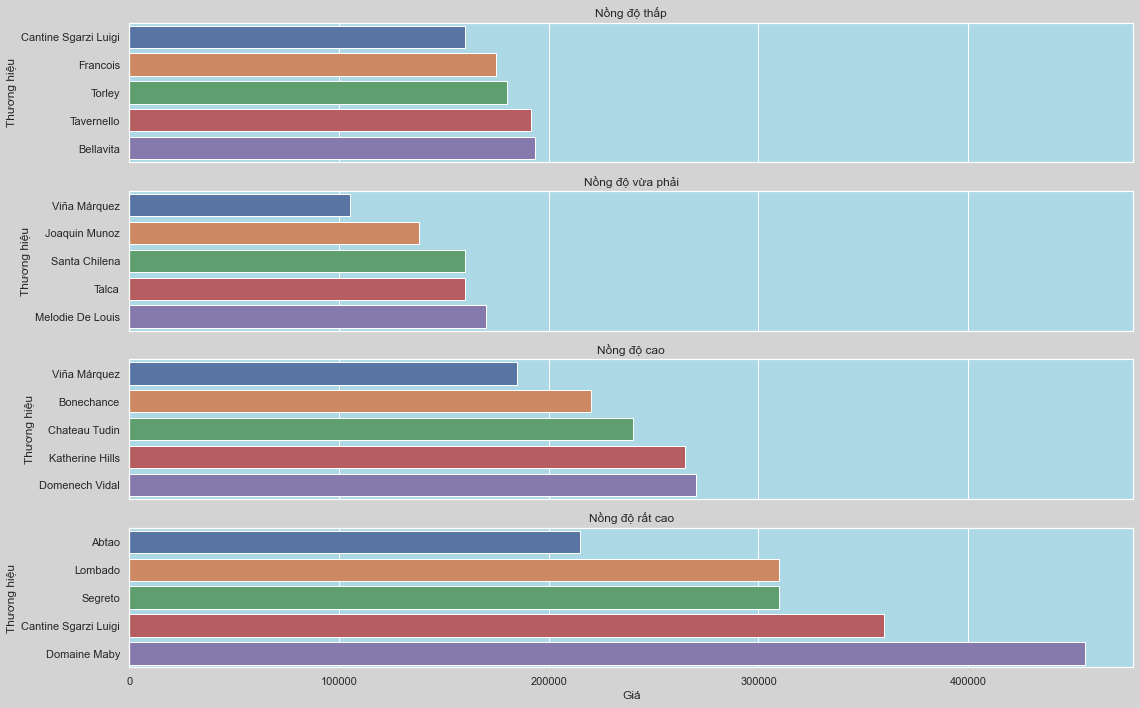

In [20]:
alcohol_classify_order = ['Nồng độ thấp', 'Nồng độ vừa phải', 'Nồng độ cao', 'Nồng độ rất cao']
fig,axes = plt.subplots(4,1, figsize = (16,10), sharex = True)
for i,ax in enumerate(axes.flat):
  sns.barplot(n_cheapest_df.loc[n_cheapest_df['alcohol_classify'] == alcohol_classify_order[i]], x = 'Gia', y = 'Thuong_hieu', ax = ax)
  if i == len(axes) - 1:
    ax.set_xlabel('Giá')
  else:
    ax.set_xlabel('')
  ax.set_ylabel('Thương hiệu')
  ax.set_title(alcohol_classify_order[i])
plt.tight_layout()

Ứng với 4 mức nồng độ, ta đã xác định được 5 thương hiệu có giá thành trung bình thấp nhất. Dựa vào biểu đồ bên trên ta rút ra được các nhận xét:
* Có vẻ là mức nồng độ tăng dần đồng nghĩa với việc giá rượu cũng tăng theo, với trường hợp ngoại lệ là mức nồng độ vừa phải có giá trung bình thấp nhất trong tất cả các mức.
* Thương hiệu có giá rượu trung bình thấp nhất ở mức nồng độ vừa phải và mức nồng độ cao đều thuộc về Vina Marquez, phù hợp với đối tượng khách hàng chuộng các sản phẩm có nồng độ không quá thấp cũng như không quá cao.
* Cantine Sgarzi Luigi là thương hiệu có giá thành rẻ nhất ở mức nồng độ thấp và cũng xếp thứ tư ở thương hiệu có giá thấp nhất ở mức nồng độ rất cao.